In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.use('tableau-colorblind10')  
plt.style.library['tableau-colorblind10'] 

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

# DATA ANALYSIS. SURVEYS VOTES

In this notebook, we conduct a detailed statistical analysis of the survey responses. Specifically, we explore the distributions and patterns of the three key thermal perception questions: Thermal Survey, Thermal Comfort and Walking Thermal Comfort. We use histograms and bar plots to visualize the overall distribution of responses.

We analyse the general pattern using all votes, and we **do not** explore how thermal perceptions vary across different sociodemographic groups (see *Data_Analysis_Votes_Sociodem.ipynb* notebook)

We use the dataset **all_surveys(votes).csv**: This dataset contains one row per vote (i.e., a TSV/TCV/wTCV response), along with the corresponding sociodemographic information of the respondent. Note: Since participants provided responses at multiple stops, individual participants may appear more than once.


### INDEX

1. Thermal comfort (TCV), thermal comfort walking (wTCV) and thermal sensation (TSV) statistics

        1.1. Statistics
        
        1.2. Histograms
        
        1.3. Horitzontal bar-plot

            
<br>


2. Correlation Heat-Maps votes.

        

## 0. Read datasets

In [60]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_votes = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes

## 1. Thermal comfort (TCV), thermal comfort walking (wTCV) and thermal sensation (TSV) statistics

In this section we analyze how the ~2000 votes (1867) are distributed across all possible answers to each question in the survey (thermal comfort, walking thermal comfort and thermal sensation). 

### 1.1. Statistics

In [12]:
columns = ['thermal_comfort', 'thermal_comfort_walking', 'thermal_sensation']

for column in columns:
    
    print(column)
    print('---------')
    print('')
    
    #print(df_votes[column].value_counts())   # Use this print for the number of votes
    print(df_votes[column].value_counts(normalize=True).mul(100).round(1))  # Use this print for % of votes (1 dec) 
    
    
    print('')
    print('####################')
    print('')

thermal_comfort
---------

thermal_comfort
Neutral                   27.9
Comfortable               17.1
Slightly uncomfortable    16.2
Slightly comfortable      15.9
Uncomfortable             11.2
Very comfortable           6.0
Very uncomfortable         5.7
Name: proportion, dtype: float64

####################

thermal_comfort_walking
---------

thermal_comfort_walking
Neutral                   29.8
Slightly uncomfortable    21.2
Uncomfortable             12.8
Comfortable               11.8
Slightly comfortable      10.1
Very uncomfortable         9.6
Very comfortable           4.7
Name: proportion, dtype: float64

####################

thermal_sensation
---------

thermal_sensation
Neutral          21.3
Hot              18.3
Warm             17.0
Slightly cool    15.2
Slightly warm    14.2
Very hot          8.6
Cool              5.5
Name: proportion, dtype: float64

####################



### 1.2. Histograms

In [20]:
def histogram(df, column, list_categories):
    '''
    Function that generates a histogram (bar plot) for a categorical column in a DataFrame,
    sorted according to a predefined list of ordered categories.

    It is particularly useful for visualizing distributions of survey responses (e.g. thermal comfort votes),
    ensuring consistent order of categories in the x-axis.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing the categorical data.
        column (str): Name of the column to plot (must contain categorical survey responses).
        list_categories (list): Ordered list of category labels (from most positive to most negative or vice versa).

    Returns:
        None. The function directly displays the histogram using seaborn/matplotlib.
    '''
    
    df2 = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    # Ensure the column is treated as an ordered categorical variable
    df2[column] = pd.Categorical(df2[column], categories=list_categories, ordered=True)
    
    # Sort DataFrame rows by category order to ensure consistent plotting
    df2.sort_values(by=column, inplace=True)

    # Create histogram (bar plot of frequencies) using seaborn
    g = sns.displot(
        data=df2,
        x=column,
        facecolor='#A2C8EC',    # Light blue fill
        edgecolor='black',      # Black border for bars
        height=5,
        aspect=1.4
    )

    # Customize tick label font sizes and orientation
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)

    # Optionally set numeric x-axis labels if the categories represent a scale (1–7, for example)
    g.set_xticklabels([str(i+1) for i in range(len(list_categories))])

    # Access the main axis to customize further
    ax = g.axes[0, 0]
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('Frequency', fontsize=18, labelpad=10)  # y-axis label

    plt.show()

Thermal comfort TCV


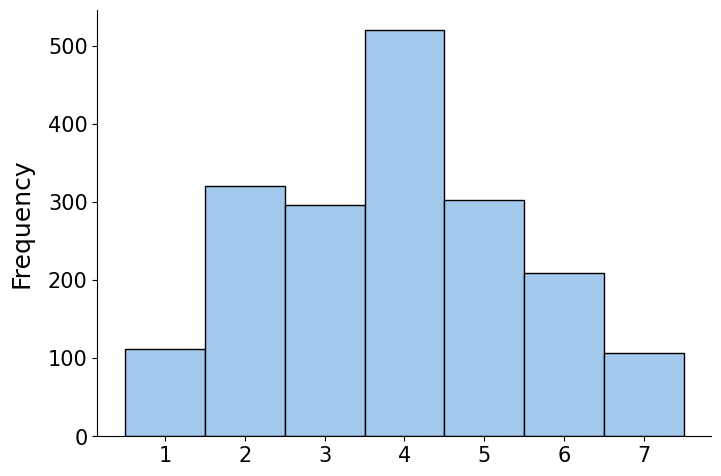

Walking thermal comfort wTCV


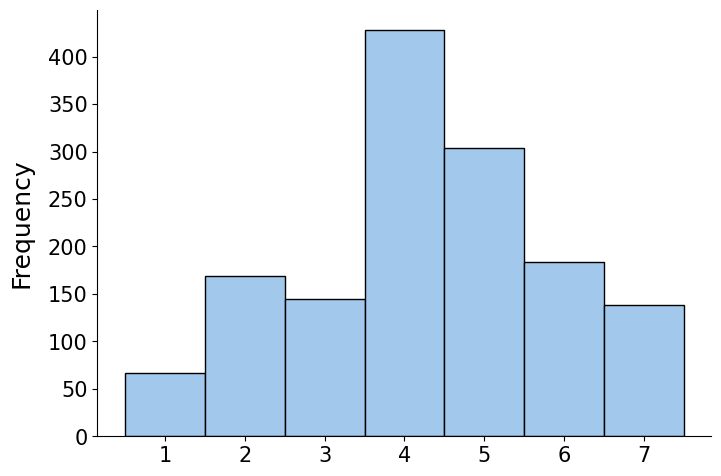

Thermal sensation TSV


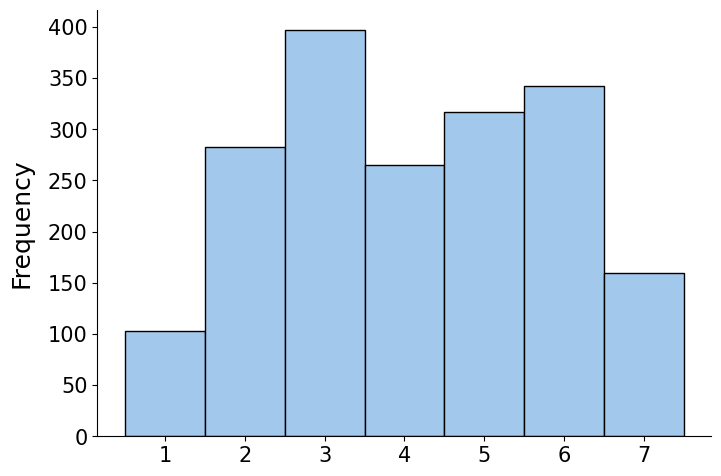

In [21]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
histogram(df_votes,'thermal_comfort',categories_TCV_and_wTCV)

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
histogram(df_votes,'thermal_comfort_walking',categories_TCV_and_wTCV)

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
histogram(df_votes,'thermal_sensation',categories_TSV)


### 1.3. Horitzontal bar-plots

In [37]:
def survey_plot(results, category_names, column_name=None):
    '''
    Plots a horizontal stacked bar chart showing the percentage distribution of responses across ordered categories.
    Special styling is applied for specific cases like 'thermal_sensation'.

    Parameters:
        results (dict): Keys are group labels (e.g., 'All', 'Women', 'Men'), 
                        values are lists of counts per category (must match category_names length).
        category_names (list): Ordered list of category labels (e.g., from cool to hot).
        column_name (str, optional): If set to 'thermal_sensation', applies specific color customizations.

    Returns:
        fig, ax: The matplotlib Figure and Axes objects.
    '''

    labels = list(results.keys())
    data = np.array(list(results.values()))  # Shape: (n_groups, n_categories)

    # Convert to percentages
    total_votes = data.sum(axis=1)
    percentages = ((data.T / total_votes) * 100).T
    cumulative = percentages.cumsum(axis=1)

    # Define color palette
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11, 0.5 * len(labels)))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)

    for i, (label, color) in enumerate(zip(category_names, category_colors)):
        # Optional color override for thermal_sensation
        if column_name == 'thermal_sensation':
            if i == 2:  # Neutral category (index 2)
                color = category_colors[3]
            elif i == 3:
                color = np.array([0.98746328, 0.9067397, 0.65926182, 1.])  # Light beige

        widths = percentages[:, i]
        starts = cumulative[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75, label=label, color=color)

        for j, rect in enumerate(rects):
            if widths[j] > 2:  # Only show text if the bar segment is visible
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + rect.get_height() / 2,
                    f'{int(round(widths[j]))}%',
                    ha='center', va='center', fontsize=11, color='black'
                )

        # Add 1–7 scale below bar (only once for the first row)
        if len(labels) == 1:
            if i == 0:
                center = cumulative[0][i] / 2
            else:
                center = cumulative[0][i - 1] + (widths[0] / 2)
            ax.text(center, 0.7, str(i + 1), fontsize=11, ha='center')

    # Add quartile lines
    for x in [25, 50, 75]:
        ax.axvline(x, ymin=0.05, ymax=0.95, color='black', linestyle='--', linewidth=1, alpha=0.3)

    # Clean up axes
    ax.tick_params(labelsize=14)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

    return fig, ax


Thermal comfort TCV


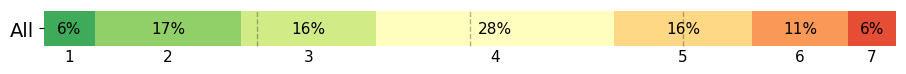

Walking thermal comfort wTCV


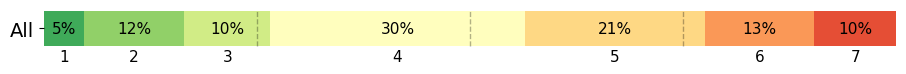

Thermal sensation TSV


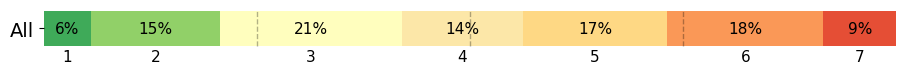

In [64]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']

categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


# BAR-PLOT THERMAL COMFORT
print('Thermal comfort TCV')
count_freq_TCV = df_votes["thermal_comfort"].value_counts().reindex(categories_TCV_and_wTCV, fill_value=0) # Count freq
results_dic_TCV = {"All": count_freq_TCV.tolist()}   # Put the results in a diccionari of lists
fig, ax = survey_plot(results_dic_TCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT  WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
count_freq_wTCV = df_votes["thermal_comfort_walking"].value_counts().reindex(categories_TCV_and_wTCV, fill_value=0) # Count freq
results_dic_wTCV = {"All": count_freq_wTCV.tolist()}   # Put the results in a diccionari of lists
fig, ax = survey_plot(results_dic_wTCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT  THERMAL SENSATION
print('Thermal sensation TSV')
count_freq_TSV = df_votes["thermal_sensation"].value_counts().reindex(categories_TSV, fill_value=0) # Count freq
results_dic_TSV = {"All": count_freq_TSV.tolist()}   # Put the results in a diccionari of lists
fig, ax = survey_plot(results_dic_TSV, categories_TSV,column_name='thermal_sensation')  # Plot
plt.show()

## 2. Correlation Heat-Maps votes

In [58]:
def correlation_map(df, column1, column2, list_categories_column1, list_categories_column2):
    '''
    Function that creates a heatmap (cross-tabulation) showing the count of occurrences
    between two survey response variables (e.g., TSV vs TCV or wTCV vs TCV).

    This allows visual inspection of the relationship between two subjective dimensions
    of thermal experience.

    Parameters:
        df (pd.DataFrame): DataFrame containing the survey responses.
        column1 (str): Name of the variable to be plotted on the y-axis.
        column2 (str): Name of the variable to be plotted on the x-axis.
        list_categories_column1 (list): Ordered list of categories for column1 (e.g., from "Very uncomfortable" to "Very comfortable").
        list_categories_column2 (list): Ordered list of categories for column2.

    Returns:
        None. Displays a heatmap using seaborn.
    '''
    
    # Copy to avoid modifying original data
    df2 = df.copy()

    # Build contingency table (frequency of each combination)
    table = pd.pivot_table(df2, index=[column1], columns=[column2], aggfunc='size', fill_value=0)

    # Ensure correct order of categories
    table = table.reindex(index=list_categories_column1[::-1],  # Reverse for heatmap orientation (1 at bottom)
                          columns=list_categories_column2)

    # Custom axis labels (1–7) if categories are ranked
    x_ticks = [str(i + 1) for i in range(len(list_categories_column2))]
    y_ticks = list(reversed(x_ticks))

    # --- Plot heatmap ---
    fig, ax = plt.subplots(figsize=(10, 7))
    heatmap = sns.heatmap(
        table,
        yticklabels=y_ticks,
        xticklabels=x_ticks,
        annot=True,
        fmt='g',
        cmap='Blues',
        annot_kws={"fontsize": 12}
    )

    # Axis label logic
    if column1 == 'thermal_comfort_walking' and column2 == 'thermal_comfort':
        heatmap.set_xlabel('TCV', fontsize=13, labelpad=14)
        heatmap.set_ylabel('wTCV', fontsize=13, labelpad=14)

    elif column1 == 'thermal_comfort' and column2 == 'thermal_sensation':
        heatmap.set_xlabel('TSV', fontsize=13, labelpad=14)
        heatmap.set_ylabel('TCV', fontsize=13, labelpad=14)

    elif column1 == 'thermal_comfort_walking' and column2 == 'thermal_sensation':
        heatmap.set_xlabel('TSV', fontsize=13, labelpad=14)
        heatmap.set_ylabel('wTCV', fontsize=13, labelpad=14)

    else:
        # Fallback labels
        heatmap.set_xlabel(column2, fontsize=13, labelpad=14)
        heatmap.set_ylabel(column1, fontsize=13, labelpad=14)

    # Format tick labels
    for label in heatmap.get_xticklabels():
        label.set_fontsize(13)

    for label in heatmap.get_yticklabels():
        label.set_fontsize(13)

    plt.tight_layout()
    plt.show()


TCV vs wTCV


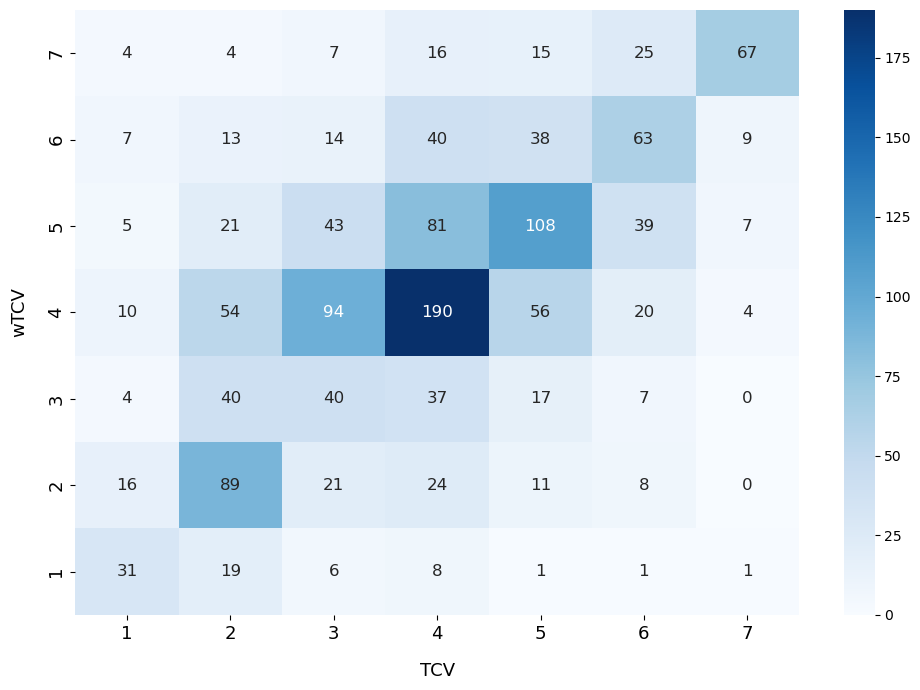

TCV vs TSV


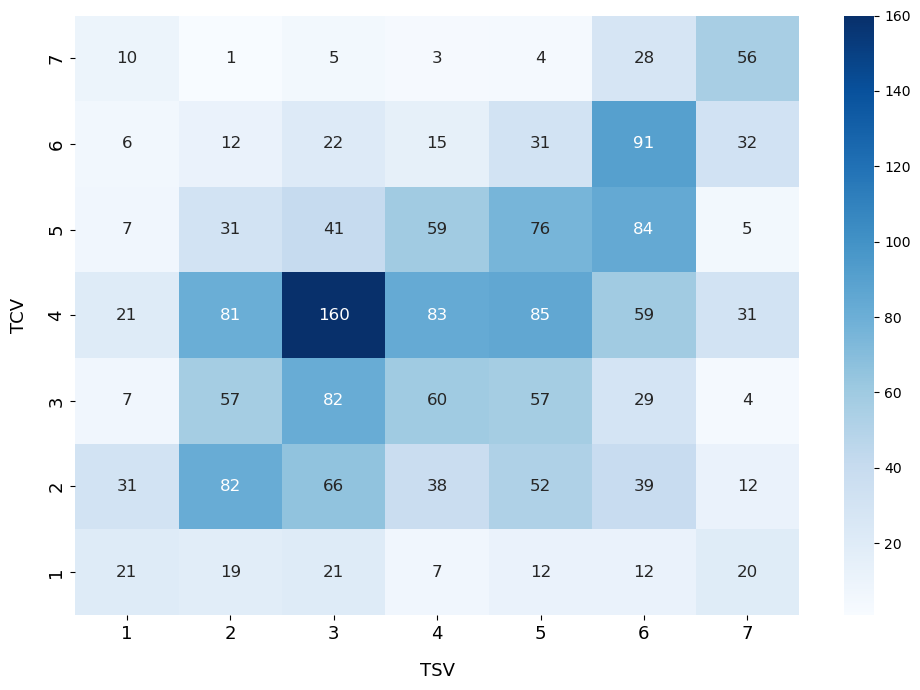

wTCV vs TSV


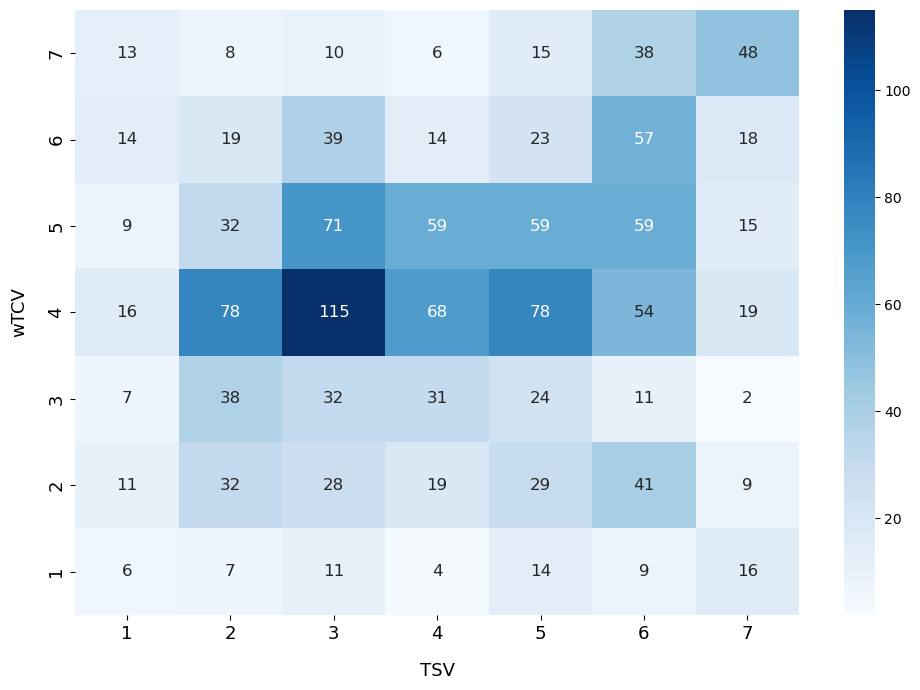

In [59]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


# CORRELATION-MAP TCV vs wTCV
print('TCV vs wTCV')
correlation_map(df_votes,'thermal_comfort_walking','thermal_comfort',categories_TCV_and_wTCV,categories_TCV_and_wTCV)


# CORRELATION-MAP TCV vs TSV
print('TCV vs TSV')
correlation_map(df_votes,'thermal_comfort','thermal_sensation',categories_TCV_and_wTCV,categories_TSV)

# CORRELATION-MAP wTCV vs TSV
print('wTCV vs TSV')
correlation_map(df_votes,'thermal_comfort_walking','thermal_sensation',categories_TCV_and_wTCV,categories_TSV)